# Collocate: Interpolate two models to compare point by point
If you want to compare two models point by point, you will need to have them on the same grid. An easy way to do this is to interpolate one model to the other. You can use the xarray method interp_like().

Example below for abs550aer for UKESM and NorESM.

In [1]:
import xarray as xr
import glob #as glob

In [7]:
path = '/home/ab9880f9-2d7bc8-2d48c2-2d9223-2d693c1d3cf3c1/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/'
var = 'abs550aer'
from_y = '1990-01-01'
to_y = '1991-01-01'
files = glob.glob(path+var+'*')#" get_fl('emibvoc',path )
files.sort()

noresm = xr.open_mfdataset(files, combine='nested', concat_dim = 'time'
                          ).sel(time=slice(from_y, to_y))
path = '/home/ab9880f9-2d7bc8-2d48c2-2d9223-2d693c1d3cf3c1/shared-cmip6-for-ns1000k/historical/UKESM1-0-LL/r1i1p1f2/'
files = glob.glob(path+var+'*')#" get_fl('emibvoc',path )
files.sort()
ukesm = xr.open_mfdataset(files, combine='nested', concat_dim = 'time'
                         ).sel(time=slice(from_y, to_y))

## The grid is not the same!
Check e.g. the lon vs lat for both models:

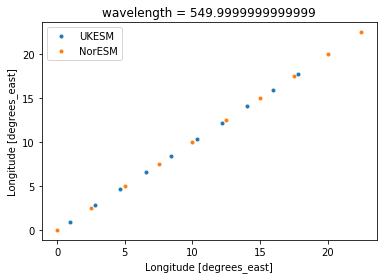

In [8]:
import matplotlib.pyplot as plt
ukesm.lon[0:10].plot(marker='.', linewidth=0, label='UKESM')
noresm.lon[0:10].plot(marker='.', linewidth=0, label='NorESM')
plt.legend()

In [9]:
noresm['time']

<xarray.DataArray 'time' (time: 12)>
array([cftime.DatetimeNoLeap(1990, 1, 16, 12, 0, 0, 0, 3, 16),
       cftime.DatetimeNoLeap(1990, 2, 15, 0, 0, 0, 0, 5, 46),
       cftime.DatetimeNoLeap(1990, 3, 16, 12, 0, 0, 0, 6, 75),
       cftime.DatetimeNoLeap(1990, 4, 16, 0, 0, 0, 0, 2, 106),
       cftime.DatetimeNoLeap(1990, 5, 16, 12, 0, 0, 0, 4, 136),
       cftime.DatetimeNoLeap(1990, 6, 16, 0, 0, 0, 0, 0, 167),
       cftime.DatetimeNoLeap(1990, 7, 16, 12, 0, 0, 0, 2, 197),
       cftime.DatetimeNoLeap(1990, 8, 16, 12, 0, 0, 0, 5, 228),
       cftime.DatetimeNoLeap(1990, 9, 16, 0, 0, 0, 0, 1, 259),
       cftime.DatetimeNoLeap(1990, 10, 16, 12, 0, 0, 0, 3, 289),
       cftime.DatetimeNoLeap(1990, 11, 16, 0, 0, 0, 0, 6, 320),
       cftime.DatetimeNoLeap(1990, 12, 16, 12, 0, 0, 0, 1, 350)], dtype=object)
Coordinates:
    wavelength  float64 550.0
  * time        (time) object 1990-01-16 12:00:00 ... 1990-12-16 12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    

In [10]:
ukesm['time']

<xarray.DataArray 'time' (time: 12)>
array([cftime.Datetime360Day(1990, 1, 16, 0, 0, 0, 0, 0, 16),
       cftime.Datetime360Day(1990, 2, 16, 0, 0, 0, 0, 2, 46),
       cftime.Datetime360Day(1990, 3, 16, 0, 0, 0, 0, 4, 76),
       cftime.Datetime360Day(1990, 4, 16, 0, 0, 0, 0, 6, 106),
       cftime.Datetime360Day(1990, 5, 16, 0, 0, 0, 0, 1, 136),
       cftime.Datetime360Day(1990, 6, 16, 0, 0, 0, 0, 3, 166),
       cftime.Datetime360Day(1990, 7, 16, 0, 0, 0, 0, 5, 196),
       cftime.Datetime360Day(1990, 8, 16, 0, 0, 0, 0, 0, 226),
       cftime.Datetime360Day(1990, 9, 16, 0, 0, 0, 0, 2, 256),
       cftime.Datetime360Day(1990, 10, 16, 0, 0, 0, 0, 4, 286),
       cftime.Datetime360Day(1990, 11, 16, 0, 0, 0, 0, 6, 316),
       cftime.Datetime360Day(1990, 12, 16, 0, 0, 0, 0, 1, 346)], dtype=object)
Coordinates:
    wavelength  float64 550.0
  * time        (time) object 1990-01-16 00:00:00 ... 1990-12-16 00:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_na

The time is more or less the same (both are monthly mean files), but slightly off (and we want them to be the same). 
So we simply force the date to be the 16th of each month.

In [11]:
import pandas as pd
def _fix_time(ds):
    ds['time'] = pd.to_datetime(ds['time'].dt.strftime('%Y-%m-16'))

_fix_time(ukesm)
_fix_time(noresm)

## Interpolating:
Now we are ready to interpolate:

In [12]:
noresm_interp = noresm.interp_like(ukesm)

### Now we can plot the difference:

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5,1,'NorESM-UKESM: abs550aer')

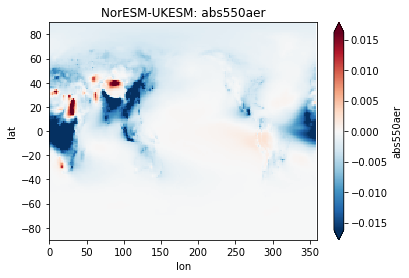

In [16]:
_rat=noresm_interp[var]-ukesm[var]

_rat.mean('time').plot(robust=True)
plt.title('NorESM-UKESM: %s'%var)

Advantage: now we can do all kinds of spacial analysis.